# Business Inteligence Sheet 5

### Juan David Camacho
### Hernán Russi
### Juan Esteban Daza 

Exercise 1: Show that the silhouette coefficient of a clustering is in[−1,+1].

$$ -1 \leq SC= \frac{1}{n} \sum_{i=1}^{n}s^{i} \leq 1 $$

Tenemos que: $$ S_{i}= \frac{\mu^{out}_{min}-\mu_{in}(x_{i})}{max(\mu^{out}_{min}(x_{i}),\mu_{in}(x_{i})} $$ es una medida relativa a las distancias $$\mu^{out}_{min}\,\,\,\,\, \& \,\,\,\,\, \mu_{in}(x_{i})$$ ya que su diferencia se divide con respecto a una de ellas.


Un caso muy similar es el de los porcentajes: $$\Delta \% x = \frac{x2-x1}{x1}$$

El denomidaor normaliza la diferencia del numerador. Si va a ser un valor de proporción, por lo cual, si lo dividimos entre n, obtendremos un valor decimal menor a 1.

Entonces: 
$$ SC= \frac{1}{n} \sum_{i=1}^{n}s^{i} $$
$$ SC= \frac{1}{n} (S1 + S2 + ... +Sn) $$
$$ SC= \frac{S1}{n} + \frac{S2}{n} + ... + \frac{Sn}{n} $$
$$\epsilon \, [-1 , 1]$$

Al normalizar todas las Si y dividirlas logramos relativizar la medida de separación.
Por lo tanto se concluy que: $$SC \, \epsilon \, [-1 , 1]$$

Exercise 2 (5 Points) In the following exercises, A represents an n×d numeric dataset (numpyarray),Drepresents the n×n distance matrix belonging to A, and C represents an iterable (for example a list or a numpy array) of n values (numbers or strings). The different values correspond to different clusters, and all indices with the same values are located within thesame cluster.

1. Write a function getDistances(A) that computes, for a numeric data matrix A (numpyarray), a distance matrix such as W seen in the lecture. The matrix (may but) does not need to contain non-zero elements above the diagonal.

In [21]:
import numpy as np
import pandas as pd

def getDistances(A):
    rows, columns = A.shape
    matrix_w = np.zeros((rows, rows))
        
    for row in range(0, rows):
        first_sel_row = A[row,:]
        for second_row in range(0, rows):
            second_sel_row = A[second_row,:]
            matrix_w[row, second_row] = np.linalg.norm(first_sel_row - second_sel_row)

    return matrix_w

2. Write a functiongetW(D, U, V) that computes the sum of weights of pairs of points in U and V respectively; U and V are lists of integers corresponding to the indices of points in D.

In [22]:
def getW(D, U, V):
    final_value = 0
    
    for u in U:
        for v in V:
            final_value += D[u, v]

    return final_value

3. Write functions getWIn(D, C) and getWOut(D, C) that compute the metrics Win and Wout seen in the lecture. Write functions getNIn(C) and getNOut(C)that compute themetrics Nin and Nout seen in the lecture.

In [23]:
import math

def getWIn(D,C):
    different_clusters = set(C)
    final_value = 0
    
    for cluster in different_clusters:
        cluster_indexes = np.array(np.where(C == cluster))[0]
        final_value += getW(D, cluster_indexes, cluster_indexes)
                
    return final_value/2
            
            
def getWOut(D,C):
    different_clusters = set(C)
    final_value = 0
    
    for cluster in different_clusters:
        for second_cluster in different_clusters:
            if (cluster != second_cluster):
                cluster_indexes = np.array(np.where(C == cluster))[0]
                second_cluster_indexes = np.array(np.where(C == second_cluster))[0]
                final_value += getW(D, cluster_indexes, second_cluster_indexes)
                
    return final_value/2


def getNIn(C):
    different_clusters = set(C)
    final_value = 0
    
    for cluster in different_clusters:
        total_n_cluster = len(np.array(np.where(C == cluster))[0])
        final_value += math.comb(total_n_cluster, 2)
    
    return final_value


def getNOut(C):
    different_clusters = set(C)
    final_value = 0
    
    for cluster in different_clusters:
        for second_cluster in different_clusters:
            if (cluster != second_cluster):
                total_n_cluster = len(np.array(np.where(C == cluster))[0])
                total_n_second_cluster = len(np.array(np.where(C == second_cluster))[0])
                final_value += total_n_cluster*total_n_second_cluster
                
    return final_value/2

4. Write functions getBetaCV(A, C), getCIndex(A, C), getNormalizedCut(A, C), getDunn(A, C), getDaviesBouldin(A, C), getSilhouette(A, C), which compute the respective measures. Add a function getMetric(A, C, metric) that receives a string metric and, depending on the name in {beta, cindex, nc, dunn, db, sil}, it returns the result of one of the above functions.

In [24]:
def getBetaCV(A, C):
    different_clusters = set(C)
    matrix_w = getDistances(A)
    final_value = (getWIn(matrix_w, C)/getNIn(C))/(getWOut(matrix_w, C)/getNOut(C))
    return final_value

def getCIndex(A, C):
    matrix_w = getDistances(A)
    WIn = getWIn(matrix_w, C)
    NIn = getNIn(C)
    flat_w = matrix_w.flatten()
    w_max = np.sum(np.sort(flat_w)[::-1][:NIn])
    w_min_indeces = np.nonzero(flat_w)
    w_min = np.sum(np.sort(flat_w[w_min_indeces])[:NIn])
    
    final_value = ((WIn - w_min)/(w_max - w_min))/2
    return final_value
    

def getNormalizedCut(A, C):
    different_clusters = set(C)
    matrix_w = getDistances(A)
    final_value = 0
    w_inter = 0
    w_intra = 0
    
    for cluster in different_clusters:
        cluster_indexes = np.array(np.where(C == cluster))[0]
        w_intra = getW(matrix_w, cluster_indexes, cluster_indexes)
        w_inter = 0
        
        for second_cluster in different_clusters:
            if (cluster != second_cluster):
                cluster_indexes = np.array(np.where(C == cluster))[0]
                second_cluster_indexes = np.array(np.where(C == second_cluster))[0]
                w_inter += getW(matrix_w, cluster_indexes, second_cluster_indexes)
        final_value += 1/((w_intra/w_inter)+1)
    
    return final_value


def getDunn(A, C):
    different_clusters = set(C)
    matrix_w = getDistances(A)
    w_in = []
    w_out = []
    final_value = 0
    
    #Calculate W in
    for cluster in different_clusters:
        cluster_indexes = np.array(np.where(C == cluster))[0]
        for index in cluster_indexes:
            for second_index in cluster_indexes:
                if (index != second_index):
                    w_in.append(matrix_w[index, second_index])
        
        #Calculate W out
        for second_cluster in different_clusters:
            if (cluster != second_cluster):
                second_cluster_indexes = np.array(np.where(C == second_cluster))[0]
                for index in cluster_indexes:
                    for second_index in second_cluster_indexes:
                        w_out.append(matrix_w[index, second_index])
                        
    final_value = np.amin(w_out)/np.amax(w_in)
    return final_value


def getDaviesBouldin(A, C):
    different_clusters = set(C)
    columns = A.shape[1]
    matrix_w = getDistances(A)
    means = []
    dispersions = []
    DBij = []
    mean = 0
    final_value = 0
    
    for cluster in different_clusters:
        cluster_indexes = np.array(np.where(C == cluster))[0]
        mean = 0
        variance = 0
        
        #Calculate total variances for each cluster
        for column in range(0, columns):
            variance += np.var(A[cluster_indexes, column])
        dispersions.append(np.sqrt(variance))
        
        #Calculate the mean vector for each cluster
        for index in cluster_indexes:
            mean += A[index, :]
        means.append(mean/len(cluster_indexes))
    
    #Calculate the values of DB for each pair of clusters    
    for cluster in range(0, len(different_clusters)):
        value = []
        for second_cluster in range(0, len(different_clusters)):
                euc_dist = np.linalg.norm(means[cluster] - means[second_cluster])
                if (euc_dist != 0):
                    value.append((dispersions[cluster] + dispersions[second_cluster])/euc_dist)
                else:
                    value.append(0)
        DBij.append(value)
                
    for davies in DBij:
        final_value += np.amax(davies)
        
    return final_value/len(different_clusters)


def getSilhouette(A, C):
    different_clusters = set(C)
    matrix_w = getDistances(A)
    si = []
    final_value = 0

    for cluster in different_clusters:
        cluster_indexes = np.array(np.where(C == cluster))[0]
        for index in cluster_indexes:
            u_in_up = 0
            u_out_up = 0
            u_in = 0
            u_out = []
            
            #Calculate U in for the given point in the given cluster
            for second_index in cluster_indexes:
                u_in_up += matrix_w[index, second_index]
            u_in = u_in_up/((len(cluster_indexes))-1)
            
            #Calculate U out for the given point wit the rest of the clusters
            for second_cluster in different_clusters:
                u_out_up = 0
                if(cluster != second_cluster):
                    second_cluster_indexes = np.array(np.where(C == second_cluster))[0]
                    for second_cluster_index in second_cluster_indexes:
                        u_out_up += matrix_w[index, second_cluster_index]
                    u_out.append(u_out_up/(len(second_cluster_indexes)))
                 
            si.append((np.amin(u_out) - u_in)/(np.amax(np.array([np.amin(u_out), u_in]))))
    
    final_value = sum(si)/150

    return final_value


def getMetric(A, C, metric):
    if (metric == "beta"):
        return getBetaCV(A,C)
    if (metric == "cindex"):
        return getCIndex(A, C)
    if (metric == "nc"):
        return getNormalizedCut(A, C)
    if (metric == "dunn"):
        return getDunn(A, C)
    if (metric == "db"):
        return getDaviesBouldin(A, C)
    if (metric == "sil"):
        return getSilhouette(A, C)

Exercise 3 (2 Points)

1. Write a function plotMetrics(D,l=100) that invokes getClusterings(D, k) l timesfor k = 2, 3, 4, 5each. The function then should create a 7×3 grid in which each figure shows a boxplot.  In this figure grid, each line represents a metric, and each column represents one of the three algorithms. In plot(i, j), show the 4 box plots summarizing,f or eachk, the i-th metric among the l runs for the j-th clustering algorithm. Hint:Be smart in the way how you arrange invocations. Don’t compute the same result several times (accidently).

In [25]:
# Using code from representatives.py given in the homework

import numpy as np
from scipy.stats import multivariate_normal as N
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd


def kMeans(D, k, eps=0.01, mu=None, max_iter=20):
    d = D.shape[1]
    if mu is None:
        mu = np.random.rand(k, d)*(np.max(D, axis=0) -
                                   np.min(D, axis=0))+np.min(D, axis=0)
    if type(mu) == list:
        mu = np.array(mu)
    s = False
    g = 0
    while not s:
        C = [np.argmin([np.linalg.norm(mu[j]-x)
                       for j in range(k)if not any(np.isnan(mu[j]))])for x in D]
        n = np.zeros(mu.shape)
        s = True
        for i in range(k):
            J = [D[j]for j in range(len(D))if C[j] == i]
            if len(J) > 0:
                n[i] = np.mean(J, axis=0)
            else:
                n[i] = np.random.rand(
                    1, d)*(np.max(D, axis=0)-np.min(D, axis=0))+np.min(D, axis=0)
            if np.linalg.norm(mu[i]-n[i]) > eps:
                s = False
        mu = n
        g += 1
        if g >= max_iter:
            s = True
    return C, mu


def EM(D, k, i, mu=None, cov=None, independent=False, max_iter=10):
    d = D.shape[1]
    if mu is None:
        mu = D[np.random.choice(range(len(D)), k)]
    if type(mu) != np.array:
        mu = np.array(mu)
    if cov is None:
        C = np.cov(D, rowvar=False)
        cov = [C for i in range(k)]
    P = [1/k for i in range(k)]
    s = False
    Q = 1
    while not s:
        Q += 1
        B = np.array(
            [list(N.pdf(D, mu[a], cov[a], allow_singular=True)*P[a])for a in range(k)])
        Z = np.sum(B, axis=0)
        T = Z != 0
        w = B[:, T]/Z[T]
        if w.shape[1] == 0:
            raise Exception(
                f"In iteration {iteration}, none of the points in the database has a measurable density anymore.")
        M = np.zeros(mu.shape)
        for i in range(k):
            wi = sum(w[i])
            M[i] = (sum([w[i, j]*x for j, x in enumerate(D[T])])/wi).reshape(1, d)
            if independent:
                cov[i] = sum([w[i, j]*np.diag([(x-mu[i])[u]**2 for u in range(d)])
                             for j, x in enumerate(D[T])])/wi
            else:
                cov[i] = sum([w[i, j]*np.matmul((x-mu[i]).reshape(d, 1),
                             (x-mu[i]).reshape(1, d))for j, x in enumerate(D[T])])/wi
            P[i] = wi/len(D[T])
        if np.abs(sum(P)-1) > 0.001:
            raise Exception("P vector "+str(P) +
                            " does not sum up to "+str(sum(P))+" != 1!")
        j = sum([np.linalg.norm(mu[z]-D[z])**2 for z in range(k)])
        s = j <= i or Q >= max_iter
        mu = M
    return np.round(w, 4), mu, cov, P


def getClusterings(D, k):
    i = 1
    C1 = kMeans(D, k, i)[0]
    Y = EM(D, k, i, independent=True)[0]
    r = EM(D, k, i, independent=False)[0]
    C2 = [np.argmax(i)for i in Y.T]
    C3 = [np.argmax(i)for i in r.T]
    return C1, C2, C3


In [26]:
import matplotlib.pyplot as plt


def plotMetrics(D, l=100):
    ks = [2, 3, 4, 5]
    metrics = ['beta', 'cindex', 'nc', 'dunn', 'db,' 'sil']
    beta_Kmeans = []
    beta_IEM = []
    beta_DEM = []
    cindex_Kmeans = []
    cindex_IEM = []
    cindex_DEM = []
    nc_Kmeans = []
    nc_IEM = []
    nc_DEM = []
    dunn_Kmeans = []
    dunn_IEM = []
    dunn_DEM = []
    db_Kmeans = []
    db_IEM = []
    db_DEM = []
    sil_Kmeans = []
    sil_IEM = []
    sil_DEM = []
    
    fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(30, 30))
    fig.tight_layout
    
    for k in ks:
        beta_Kmeans_i = []
        beta_IEM_i = []
        beta_DEM_i = []
        cindex_Kmeans_i = []
        cindex_IEM_i = []
        cindex_DEM_i = []
        nc_Kmeans_i = []
        nc_IEM_i = []
        nc_DEM_i = []
        dunn_Kmeans_i = []
        dunn_IEM_i = []
        dunn_DEM_i = []
        db_Kmeans_i = []
        db_IEM_i = []
        db_DEM_i = []
        sil_Kmeans_i = []
        sil_IEM_i = []
        sil_DEM_i = []
        for l in range(l):
            C = getClusterings(D, k)
            if (len(set(np.array(C[0]))) > 1 and len(set(np.array(C[1]))) > 1 and len(set(np.array(C[2]))) > 1):
                beta_Kmeans_i.append(getMetric(D, np.array(C[0]), 'beta'))
                beta_IEM_i.append(getMetric(D, np.array(C[1]), 'beta'))
                beta_DEM_i.append(getMetric(D, np.array(C[2]), 'beta'))
                cindex_Kmeans_i.append(getMetric(D, np.array(C[0]), 'cindex'))
                cindex_IEM_i.append(getMetric(D, np.array(C[1]), 'cindex'))
                cindex_DEM_i.append(getMetric(D, np.array(C[2]), 'cindex'))
                nc_Kmeans_i.append(getMetric(D, np.array(C[0]), 'nc'))
                nc_IEM_i.append(getMetric(D, np.array(C[1]), 'nc'))
                nc_DEM_i.append(getMetric(D, np.array(C[2]), 'nc'))
                dunn_Kmeans_i.append(getMetric(D, np.array(C[0]), 'dunn'))
                dunn_IEM_i.append(getMetric(D, np.array(C[1]), 'dunn'))
                dunn_DEM_i.append(getMetric(D, np.array(C[2]), 'dunn'))
                db_Kmeans_i.append(getMetric(D, np.array(C[0]), 'db'))
                db_IEM_i.append(getMetric(D, np.array(C[1]), 'db'))
                db_DEM_i.append(getMetric(D, np.array(C[2]), 'db'))
                sil_Kmeans_i.append(getMetric(D, np.array(C[0]), 'sil'))
                sil_IEM_i.append(getMetric(D, np.array(C[1]), 'sil'))
                sil_DEM_i.append(getMetric(D, np.array(C[2]), 'sil'))
        beta_Kmeans.append(beta_Kmeans_i)
        beta_IEM.append(beta_IEM_i)
        beta_DEM.append(beta_DEM_i)
        cindex_Kmeans.append(cindex_Kmeans_i)
        cindex_IEM.append(cindex_IEM_i)
        cindex_DEM.append(cindex_DEM_i)
        nc_Kmeans.append(nc_Kmeans_i)
        nc_IEM.append(nc_IEM_i)
        nc_DEM.append(nc_DEM_i)
        dunn_Kmeans.append(dunn_Kmeans_i)
        dunn_IEM.append(dunn_IEM_i)
        dunn_DEM.append(dunn_DEM_i)
        db_Kmeans.append(db_Kmeans_i)
        db_IEM.append(db_IEM_i)
        db_DEM.append(db_DEM_i)
        sil_Kmeans.append(sil_Kmeans_i)
        sil_IEM.append(sil_IEM_i)
        sil_DEM.append(sil_DEM_i)

    axs[0,0].boxplot(beta_Kmeans)
    axs[0,1].boxplot(beta_IEM)
    axs[0,2].boxplot(beta_DEM)
    axs[1,0].boxplot(cindex_Kmeans)
    axs[1,1].boxplot(cindex_IEM)
    axs[1,2].boxplot(cindex_DEM)
    axs[2,0].boxplot(nc_Kmeans)
    axs[2,1].boxplot(nc_IEM)
    axs[2,2].boxplot(nc_DEM)
    axs[3,0].boxplot(dunn_Kmeans)
    axs[3,1].boxplot(dunn_IEM)
    axs[3,2].boxplot(dunn_DEM)
    axs[4,0].boxplot(db_Kmeans)
    axs[4,1].boxplot(db_IEM)
    axs[4,2].boxplot(db_DEM)
    axs[5,0].boxplot(sil_Kmeans)
    axs[5,1].boxplot(sil_IEM)
    axs[5,2].boxplot(sil_DEM)  

2. Plot metrics for the datasets iris, mall_customers, and delayedflights-small. Based on these results for l= 100, which value for k, and which algorithm would you suggest to realize the clustering?

C:\Users\jedaz\AppData\Local\Temp\ipykernel_28920\443968067.py:128: RuntimeWarning: invalid value encountered in double_scalars
  u_in = u_in_up/((len(cluster_indexes))-1)


terminado iris
terminado mall


C:\Users\jedaz\AppData\Local\Temp\ipykernel_28920\443968067.py:128: RuntimeWarning: invalid value encountered in double_scalars
  u_in = u_in_up/((len(cluster_indexes))-1)


terminado flights


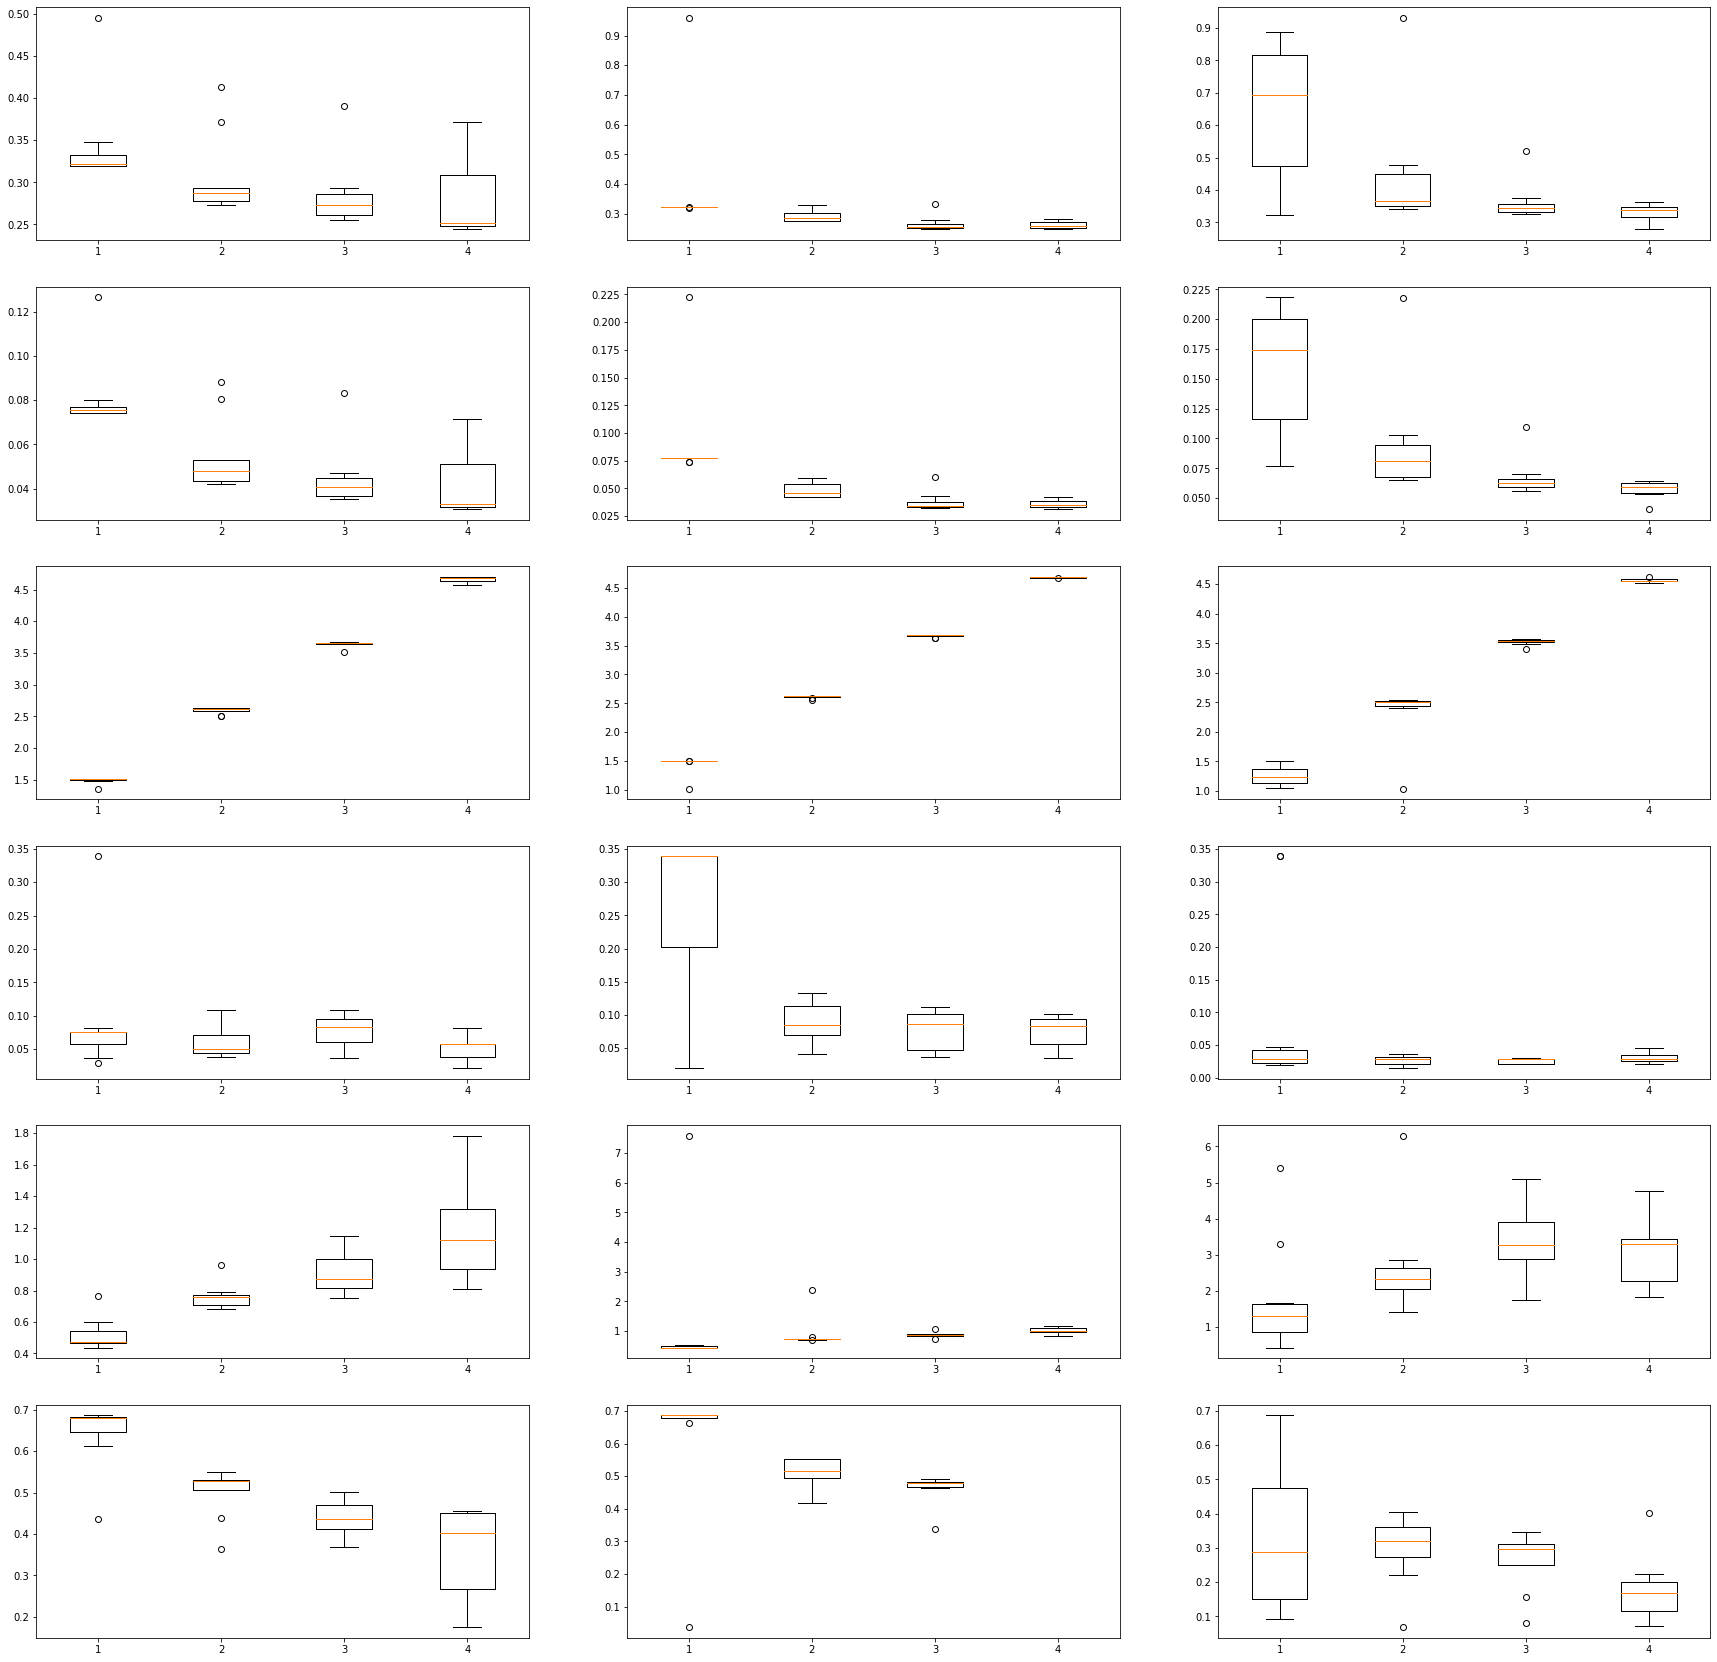

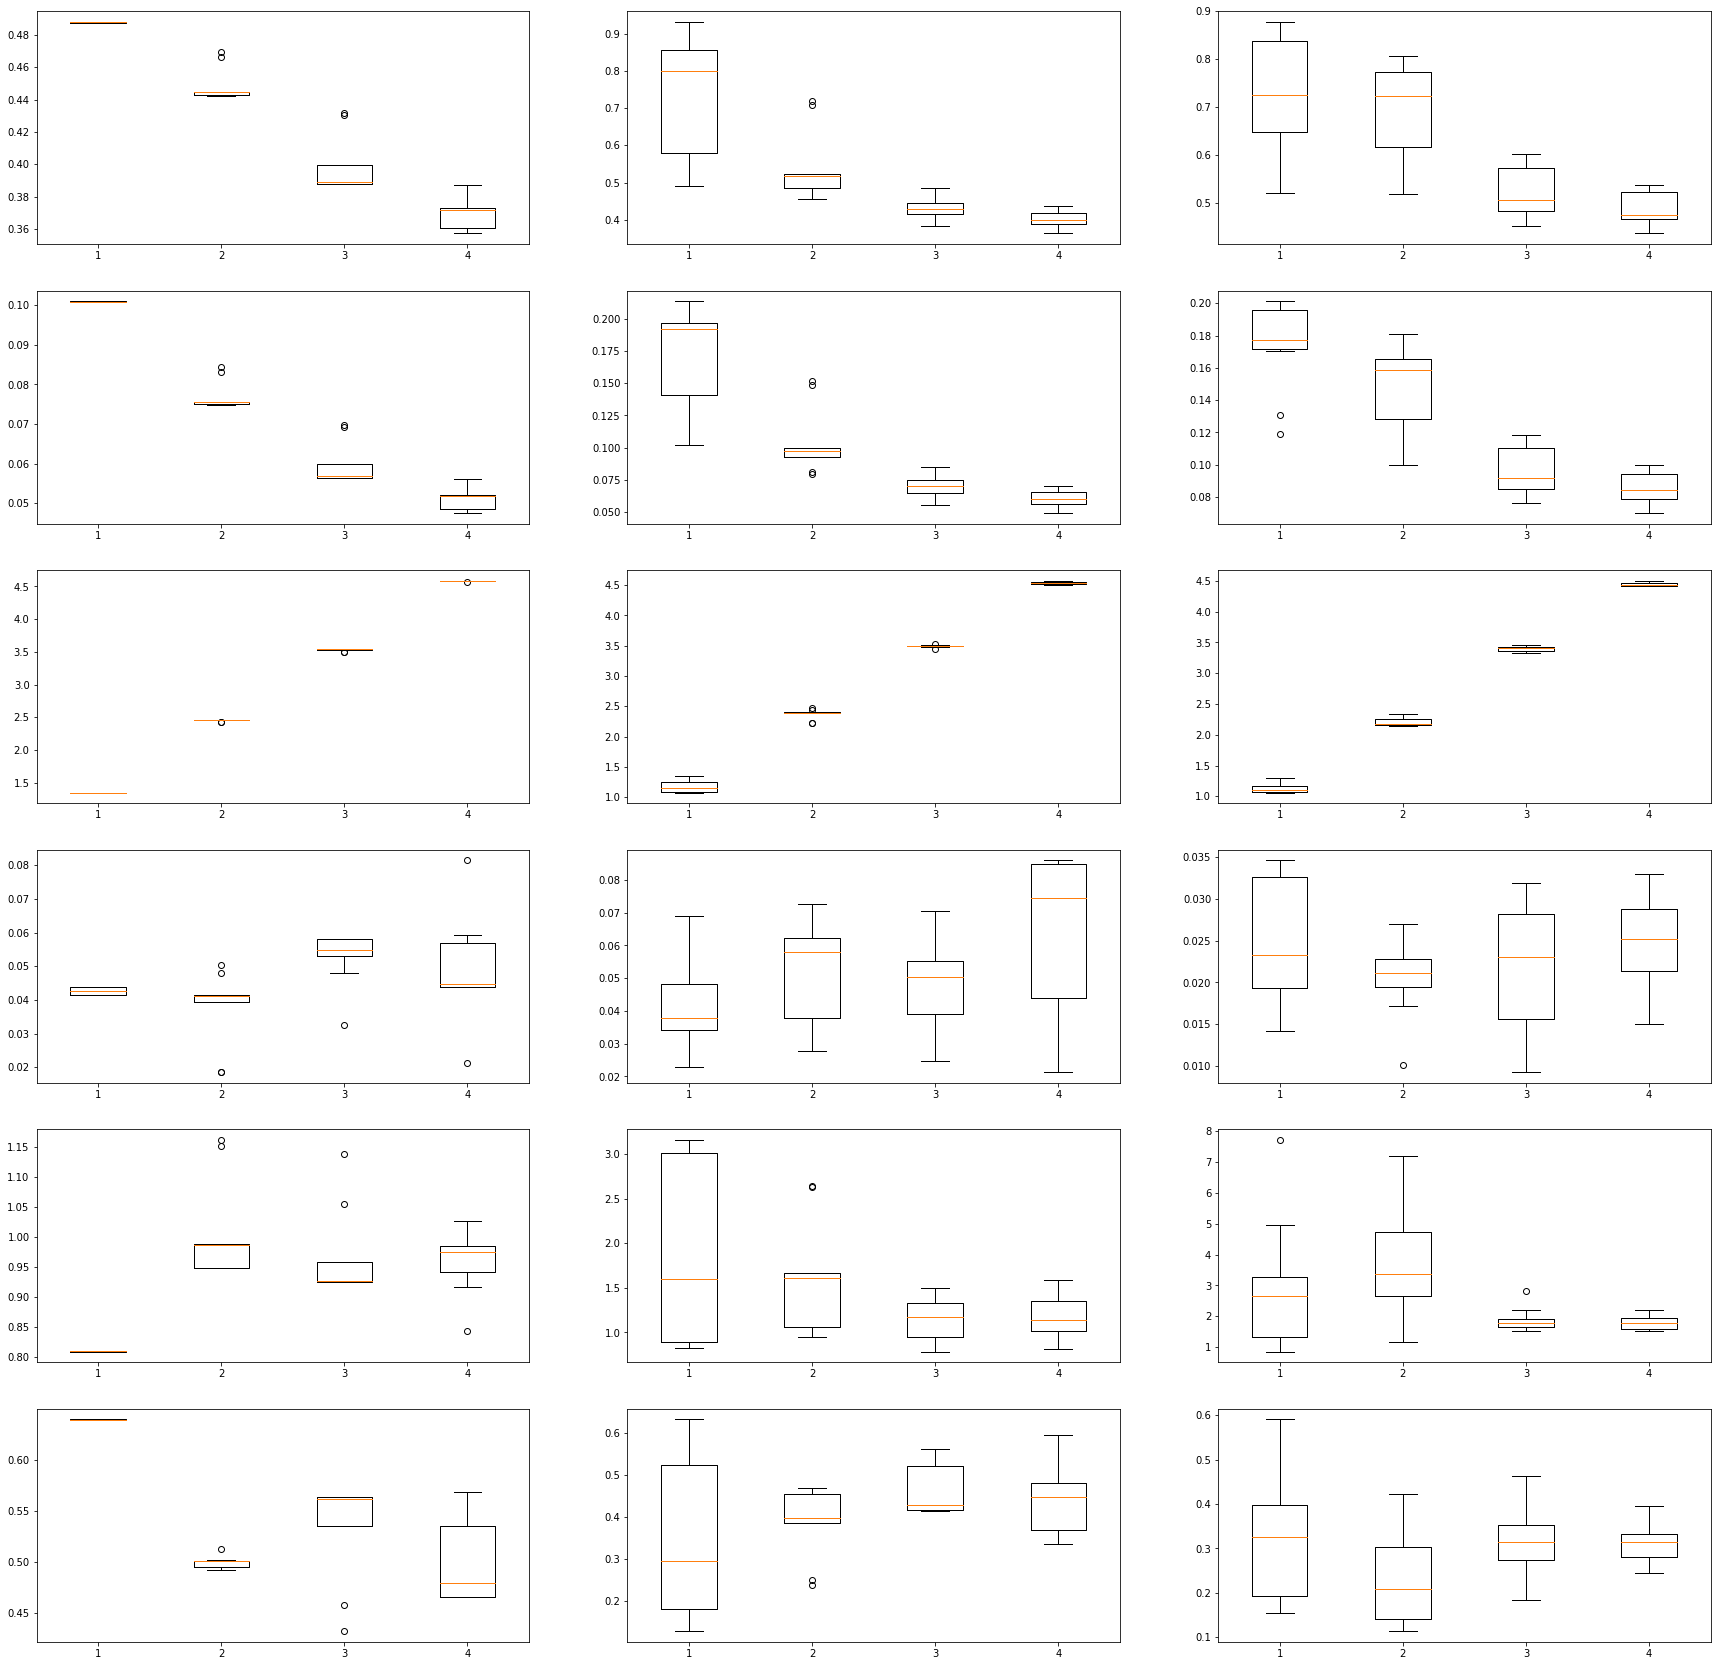

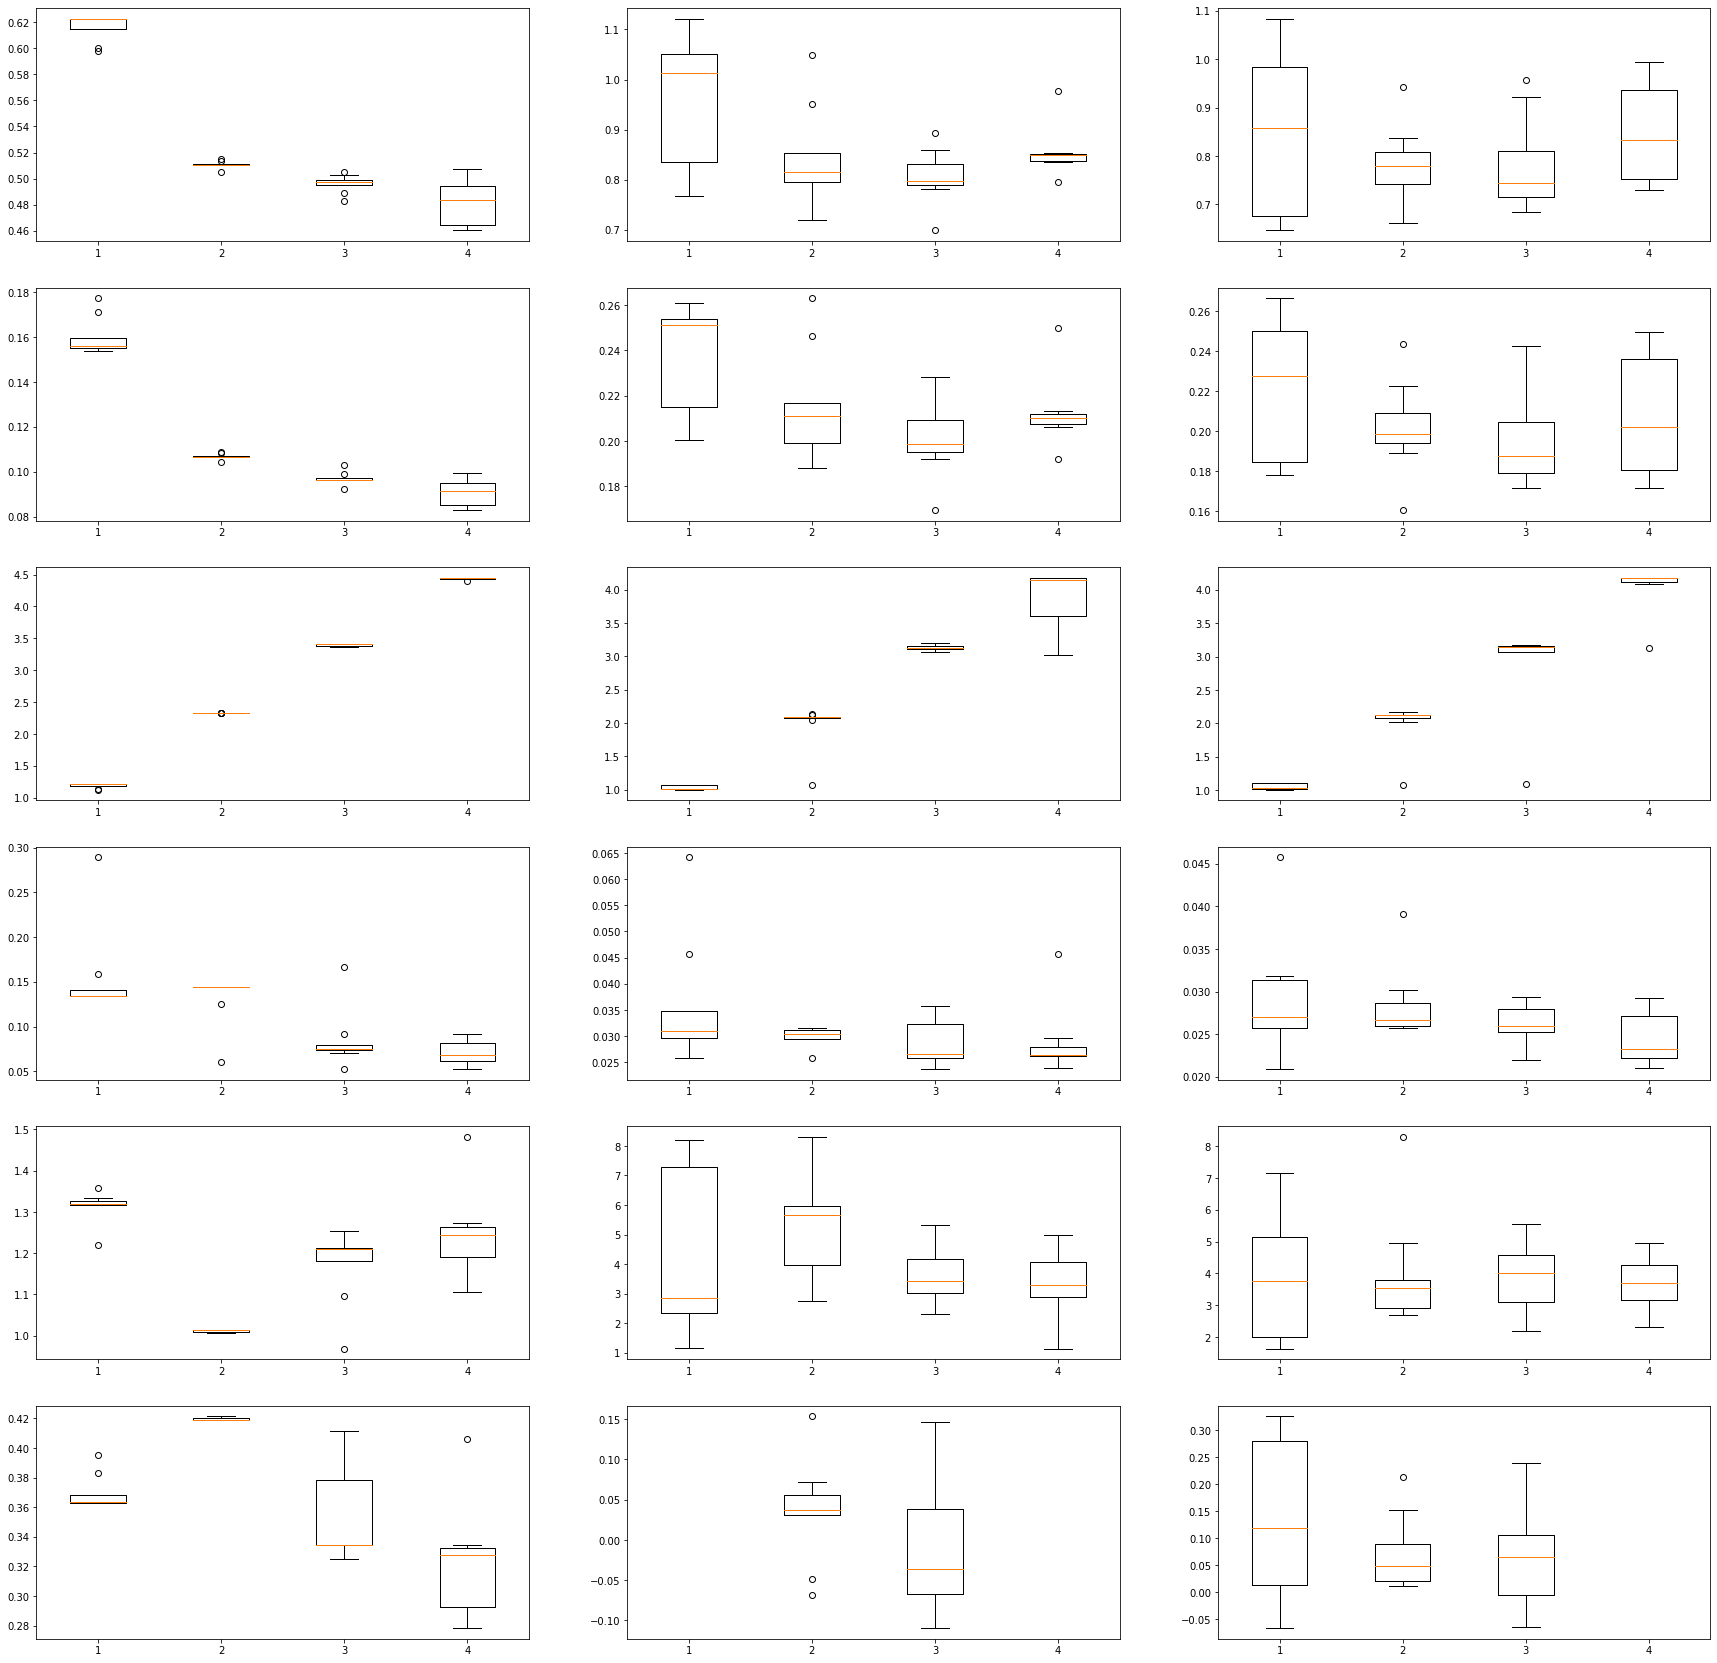

In [43]:
iris = pd.read_csv('iris.csv')
Iris_set = iris[iris.columns[:4]].values.astype(float)
mall = pd.read_csv('Mall_Customers.csv', usecols = ['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)'])
Mall_set = mall[mall.columns[:4]].values.astype(float)
flights = pd.read_csv('delayedflights-small.csv', usecols=['Year','Month','DayofMonth','DayOfWeek','DepTime','CRSDepTime','ArrTime','CRSArrTime','FlightNum','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','DepDelay','Distance','TaxiIn','TaxiOut','Cancelled','Diverted','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], nrows=150)
Flights_set = flights[flights.columns[:27]].values.astype(float)


#print(Iris_set)

plotMetrics(Iris_set, l=10)
print('terminado iris')
plotMetrics(Mall_set, l=10)
print('terminado mall')
plotMetrics(Flights_set, l=10)
print('terminado flights')

For the Iris Data set the best K is 2, and the best algorithm is the Independent EM based on the graphed metrics

For the Mall data set the best K is 4 with the dependent EM algorithm

For the Flights set the best k is 3 withthe independent EM algorithm

## Pruebas Unitarias

In [28]:
dfIrisTest = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
A_Iris_Test = dfIrisTest[dfIrisTest.columns[:4]].values.astype(float)
C_Iris_Test = dfIrisTest[dfIrisTest.columns[4]].values
D_Iris_Test = getDistances(A_Iris_Test)

## unit test for distance matrix
exp = {
    (0, 4): 0.1414213562373093,
    (3, 4): 0.6480740698407862,
    (99, 32): 3.184336665618131
}
for e in exp:
    a = D_Iris_Test[e] if D_Iris_Test[e] != 0 else D_Iris_Test[e[1],e[0]]
    print ("Entry " + str(e) + ": " + ("OK" if np.isclose(a, exp[e]) else "FAILED"))
    
# Test weights
C1 = np.where(C_Iris_Test == 'setosa')[0]
C2 = np.where(C_Iris_Test == 'versicolor')[0]
C3 = np.where(C_Iris_Test == 'virginica')[0]
CList = [C1, C2, C3]

print ("\nTest Weight Measures\n------------------")
expectedW = {
    (0,1): 8246,
    (0,2): 12056,
    (1,2): 4606
}
wSummary = "W: "
wFailed = False
for i in range(3):
    for j in range(i):
        p1 = (i,j)
        p2 = (j,i)
        W1 = np.round(getW(D_Iris_Test, CList[i], CList[j]))
        W2 = np.round(getW(D_Iris_Test, CList[j], CList[i]))
        if W1 != W2:
            if not wFailed:
                wSummary += "failed"
            wSummary += "\n\tasymmetry of W: " + str(W1) + " != " + str(W2)
            wFailed = True
        
        if W1 != expectedW[p2]:
            if not wFailed:
                wSummary += "failed"
            wSummary += "\n\tunexpected value of W: " + str(W1) + " instead of expected " + str(expectedW[p2])
            wFailed = True
if not wFailed:
    wSummary += "ok"
print(wSummary)
expectedWIn = 3518
expectedWOut = 24908
expectedNIn = 3675
expectedNOut = 7500
print("WIn:", "ok" if np.abs(np.round(getWIn(D_Iris_Test, C_Iris_Test)) - expectedWIn) < 2 else "failed")
print("WOut:", "ok" if np.abs(np.round(getWOut(D_Iris_Test, C_Iris_Test)) - expectedWOut) < 2 else "failed")
print("NIn:", "ok" if getNIn(C_Iris_Test) == 3675 else "failed")
print("NOut:", "ok" if getNOut(C_Iris_Test) == 7500 else "failed")

# Test metrics
print ("\nTest Metrics\n------------------")
expected = {
    "beta": 0.2882861014913346,
    "cindex": 0.046803774122703735,
    "nc": 2.6150343040385264,
    "dunn": 0.05848053214719304,
    "db": 0.8445815484442534,
    "sil": 0.5032506980665507
}
for m in expected:
    e = np.round(expected[m], 2)
    a = getMetric(A_Iris_Test, C_Iris_Test, m)
    a = np.round(a, 2) if not a is None else None
    print(m + ":\t", "ok" if e == a else "failed. Expected " + str(e) + " but saw " + str(a))

Entry (0, 4): OK
Entry (3, 4): OK
Entry (99, 32): OK

Test Weight Measures
------------------
W: ok
WIn: ok
WOut: ok
NIn: ok
NOut: ok

Test Metrics
------------------
beta:	 ok
cindex:	 ok
nc:	 ok
dunn:	 ok
db:	 ok
sil:	 ok
